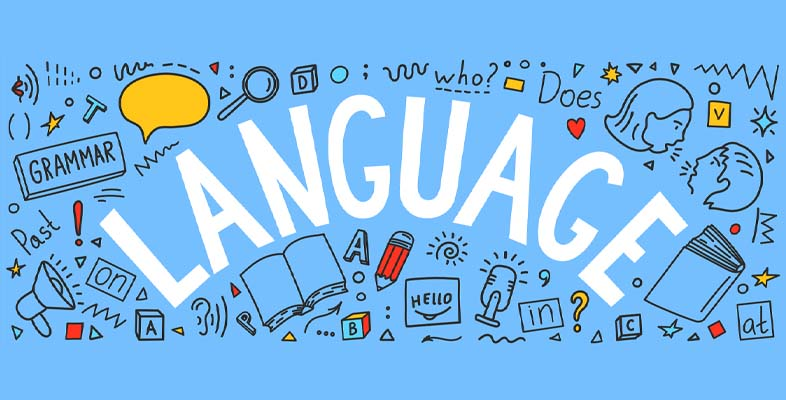 </center>

# Giriş

<font color = 'green'>
İçerik: 
    
1. [Kütüphaneler ve veri yükleme](#1)
1. [Ön işleme](#2)
     * [Dil seviyesi](#3)
     * [Karakter düzeltme](#4)
     * [Dil düzeltme işlemi](#5)
1. [Feature engineering](#6)
    * [TotalLanguage değişkeni](#7)
    * [Değişken birleştirme](#8)
1. [Keşifçi veri analizi (EDA)](#9)
    * [Değişken sınırlandırma](#10)
    * [Kategorik değişken analizi](#11)
    * [Sayısal değişken analizi](#12)
1. [df_language veri seti oluşturma](#13)

<a id = "1"></a><br>
# 1. Kütüphaneler ve veri yükleme

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt

%matplotlib inline
color = '#2ca25f'
cmap1 = 'Greens'
cmap2 =  'Set3'
palette1 = 'Greens'
palette2 = 'Set3'

root = '/kaggle/input/garanti-bbva-data-camp/'
target = 'moved_after_2019'
idx = 'user_id'

In [2]:
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_lang  = pd.read_csv(os.path.join(root, 'languages.csv'))
df_train = pd.read_csv(os.path.join(root, 'train_users.csv'))
df_test  = pd.read_csv(os.path.join(root, 'test_users.csv'))

df = pd.concat([df_train, df_test], axis=0)

<a id = "2"></a><br>
# 2. Ön işleme

<a id = "3"></a><br>
## 2.1 Dil seviyesi

In [4]:
df_lang = df_lang[df_lang['language'].notnull() & df_lang['proficiency'].notnull()]

lang_rank = {
    'elementary': 1,
    'limited_working': 2,
    'professional_working': 3,
    'full_professional': 4,
    'native_or_bilingual': 5
}

df_lang.loc[:, 'proficiency'] = df_lang.loc[:, 'proficiency'].map(lang_rank)

df_lang = df_lang[df_lang['proficiency'] > 2]
df_lang.head()

,user_id,language,proficiency
0,8,İngilizce,4
1,8,Türkçe,5
4,11,Turkish,5
5,11,English,3
6,11,Kurdish,5


* Language ve Proficiency değerleri boş olanları veri setinden çıkarıyorum.
* İngilizce seviyeleri için https://www.kaggle.com/code/greysky/randomforest-baseline paylaşımı örnek alınmıştır.
* Professional Working ve üzeri seviyede yer alanlar dil bilgisi olan kişiler olarak filtrelenmiştir.

<a id = "4"></a><br>
## 2.2 Karakter düzeltme

In [5]:
df_lang['language'] = df_lang.language.apply(lambda x: " ".join(x.upper() for x in x.split())) # Büyük harf dönüşümü.
df_lang['language'] = df_lang.language.str.replace('[^\w\s]', '',regex = True) # noktalama işaretlerinin ortadan kaldırılması.
df_lang['language'] = df_lang.language.str.replace('\d', '',regex = True) # sayıların ortadan kaldırılması.

# Türkçe karakter düzeltme işlemi.
duzeltilecek_harfler = "çÇğĞıİöÖşŞüÜ"
duzeltilmis_harfler = "cCgGiIoOsSuU"
alfabe_duzeltme = str.maketrans(duzeltilecek_harfler, duzeltilmis_harfler)
df_lang['language'] = df_lang.language.str.translate(alfabe_duzeltme) 

df_lang['language'] = df_lang.language.str.strip() # Boşluk silme.

df_lang.language.value_counts().head(20)

INGILIZCE                  14587
TURKCE                     11923
ENGLISH                    11639
TURKISH                     7496
GERMAN                       341
ARABIC                       299
ALMANCA                      269
FRENCH                       199
INGILIZCE ORTA               120
RUSSIAN                      119
AZERBAIJANI                  115
FRANSIZCA                    108
PERSIAN                       79
ARAPCA                        71
RUSCA                         69
KURDISH                       60
AZERICE                       57
URDU                          56
INGILIZCE ESKI YAKLASIK       52
KURTCE                        47
Name: language, dtype: int64

* Language değişkeninde sırası ile;

    * Büyük harfe çevirme,
    * Noktalama işaretlerini silme,
    * Sayı içeren değerlerin kaldırılması,
    * Türkçe karakter düzeltmeleri,
    * Boşlukların silinmesi,

 işlemleri yapılmıştır.

<a id = "5"></a><br>
## 2.3 Dil düzeltme işlemi

In [6]:
df_lang.loc[df_lang['language'].str.contains("ENG|ING"), 'language'] = "ENGLISH"
df_lang.loc[df_lang['language'].str.contains("AZƏ|AZE"), 'language'] = "AZERBAIJANI" 
df_lang.loc[df_lang['language'].str.contains("TUR|TUKCE"), 'language'] = "TURKISH"
df_lang.loc[df_lang['language'].str.contains("ALM|GER|DEU"), 'language'] = "GERMAN"
df_lang.loc[df_lang['language'].str.contains("FR"), 'language'] = "FRENCH"
df_lang.loc[df_lang['language'].str.contains("ESPA|ISP|SPA"), 'language'] = "SPANISH"
df_lang.loc[df_lang['language'].str.contains("RUS"), 'language'] = "RUSSIAN"
df_lang.loc[df_lang['language'].str.contains("ARA"), 'language'] = "ARABIC" 
df_lang.loc[df_lang['language'].str.contains("CHI|CIN"), 'language'] = "CHINESE"
df_lang.loc[df_lang['language'].str.contains("FAR|PERS"), 'language'] = "PERSIAN"
df_lang.loc[df_lang['language'].str.contains("JAP"), 'language'] = "JAPANESE"
df_lang.loc[df_lang['language'].str.contains("ITAL"), 'language'] = "ITALIAN"
df_lang.loc[df_lang['language'].str.contains("KUR"), 'language'] = "KURDISH"

df_lang.loc[~df_lang["language"].isin(["ENGLISH","AZERBAIJANI","TURKISH","GERMAN","FRENCH","SPANISH","RUSSIAN","ARABIC","CHINESE","PERSIAN","JAPANESE","ITALIAN","KURDISH"]), "language"] = "OTHERLANGUAGE"

df_lang.language.value_counts().head(10)

ENGLISH          26525
TURKISH          19558
GERMAN             654
OTHERLANGUAGE      551
ARABIC             374
FRENCH             321
RUSSIAN            189
AZERBAIJANI        179
KURDISH            112
PERSIAN             93
Name: language, dtype: int64

* Language değişkeninde dil düzeltme işlemlerinin yapılması.

<a id = "6"></a><br>
# 3. Feature engineering


<a id = "7"></a><br>
## 3.1 TotalLanguage değişkeni

In [7]:
df_total = df_lang.pivot_table(index='user_id',values='language',aggfunc='count')
df_total.columns = ['TOTALLANGUAGE']

df_lang = df_lang.merge(df_total, on="user_id", how="left")
df_lang.head()

,user_id,language,proficiency,TOTALLANGUAGE
0,8,ENGLISH,4,2
1,8,TURKISH,5,2
2,11,TURKISH,5,3
3,11,ENGLISH,3,3
4,11,KURDISH,5,3


* Toplam dil bilgisi değişkeni oluşturulmuştur.

In [8]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48721 entries, 0 to 48720
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        48721 non-null  int64 
 1   language       48721 non-null  object
 2   proficiency    48721 non-null  int64 
 3   TOTALLANGUAGE  48721 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


In [9]:
df_lang = df_lang.drop_duplicates(['user_id','language']) 
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48472 entries, 0 to 48720
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        48472 non-null  int64 
 1   language       48472 non-null  object
 2   proficiency    48472 non-null  int64 
 3   TOTALLANGUAGE  48472 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


* 249 çoklanan değer silindi.

<a id = "8"></a><br>
## 3.2 Değişken birleştirme

In [10]:
df_lang["LANGUAGEPROFIENCY"] = df_lang['language'] + "_" + df_lang['proficiency'].astype(str)
df_lang.drop(columns=["language","proficiency"], inplace = True)
df_lang.head()

,user_id,TOTALLANGUAGE,LANGUAGEPROFIENCY
0,8,2,ENGLISH_4
1,8,2,TURKISH_5
2,11,3,TURKISH_5
3,11,3,ENGLISH_3
4,11,3,KURDISH_5


In [11]:
df_lang = df_lang.merge(df, on="user_id", how="left")
df_lang.drop(columns=["industry","location"], inplace = True)
# df_lang = df_lang[df_lang['moved_after_2019'].notnull()]

df_lang.head()

,user_id,TOTALLANGUAGE,LANGUAGEPROFIENCY,moved_after_2019
0,8,2,ENGLISH_4,0.000
1,8,2,TURKISH_5,0.000
2,11,3,TURKISH_5,NaN
3,11,3,ENGLISH_3,NaN
4,11,3,KURDISH_5,NaN


<a id = "12"></a><br>
# 4. Keşifçi veri analizi (EDA)

<a id = "13"></a><br>
## 4.1 Değişken sınırlandırma

In [12]:
cat_cols = ['LANGUAGEPROFIENCY']
num_cols = ['TOTALLANGUAGE']

<a id = "14"></a><br>
## 4.2 Kategorik değişken analizi

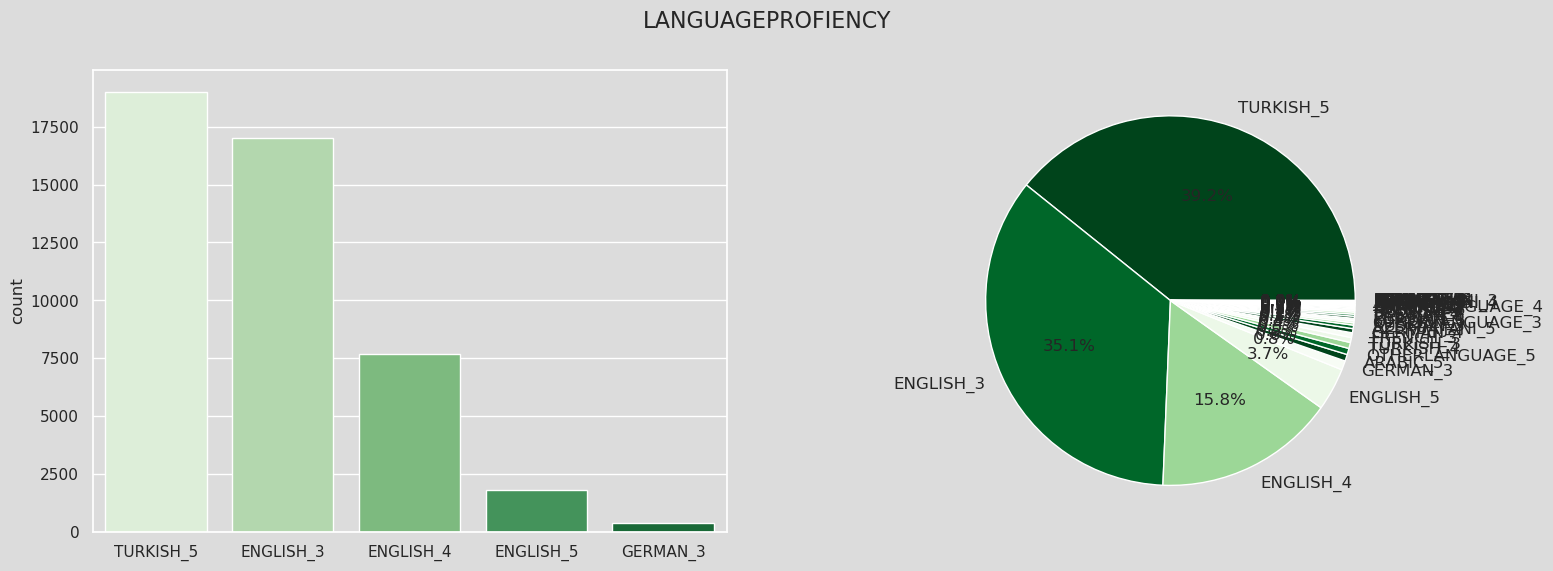

In [13]:
def cat_analyser(data, col, freq_limit = 5):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(cmap1)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()


for col in cat_cols:
    cat_analyser(df_lang, col)

In [14]:
# Kategorik değişkenlerin hedef değişken ile analizi;
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    
for col in cat_cols:
    target_summary_with_cat(df_lang,"moved_after_2019",col)

                   TARGET_MEAN
LANGUAGEPROFIENCY             
ARABIC_3                 0.390
ARABIC_4                 0.353
ARABIC_5                 0.391
AZERBAIJANI_3            0.000
AZERBAIJANI_4            0.375
AZERBAIJANI_5            0.397
CHINESE_3                0.000
CHINESE_4                  NaN
CHINESE_5                1.000
ENGLISH_3                0.439
ENGLISH_4                0.425
ENGLISH_5                0.419
FRENCH_3                 0.348
FRENCH_4                 0.282
FRENCH_5                 0.480
GERMAN_3                 0.385
GERMAN_4                 0.341
GERMAN_5                 0.611
ITALIAN_3                0.429
ITALIAN_4                0.600
ITALIAN_5                0.000
JAPANESE_3               0.000
JAPANESE_4               1.000
JAPANESE_5               0.692
KURDISH_3                0.545
KURDISH_4                0.333
KURDISH_5                0.423
OTHERLANGUAGE_3          0.235
OTHERLANGUAGE_4          0.452
OTHERLANGUAGE_5          0.536
PERSIAN_

<a id = "15"></a><br>
## 4.3 Sayısal değişken analizi

count   48472.000
mean        1.886
std         0.653
min         1.000
10%         1.000
30%         2.000
50%         2.000
70%         2.000
90%         3.000
95%         3.000
99%         4.000
max        10.000
Name: TOTALLANGUAGE, dtype: float64


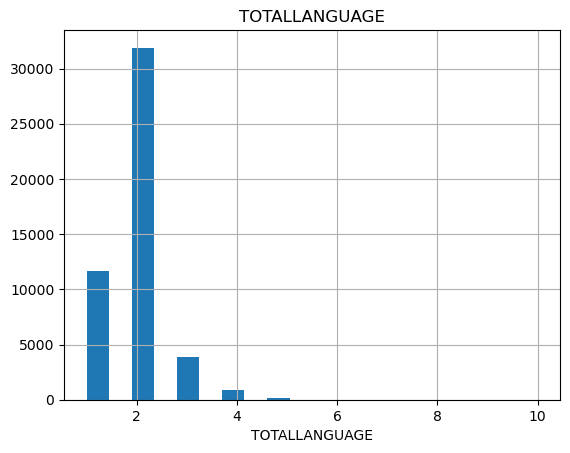

In [15]:
# Numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.10, 0.30, 0.50, 0.70, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()    

for col in num_cols:
    num_summary(df_lang, col, True)

In [16]:
# Numerik değişkenlerin hedef değişken ile analizi;
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")
    
for col in num_cols:
    target_summary_with_num(df_lang, "moved_after_2019", col)

                  TOTALLANGUAGE
moved_after_2019               
0.000                     1.885
1.000                     1.886




In [17]:
df_lang.head()

,user_id,TOTALLANGUAGE,LANGUAGEPROFIENCY,moved_after_2019
0,8,2,ENGLISH_4,0.000
1,8,2,TURKISH_5,0.000
2,11,3,TURKISH_5,NaN
3,11,3,ENGLISH_3,NaN
4,11,3,KURDISH_5,NaN


<a id = "18"></a><br>
# 5. df_language veri seti oluşturma

In [18]:
df_lang.drop(columns=["moved_after_2019"], inplace = True)
df_lang2 = df_lang.pivot_table(index='user_id', columns='LANGUAGEPROFIENCY',values = 'LANGUAGEPROFIENCY',aggfunc='nunique')
df_lang2.fillna(0, inplace=True)
df_lang2.head()

LANGUAGEPROFIENCY,ARABIC_3,ARABIC_4,ARABIC_5,AZERBAIJANI_3,AZERBAIJANI_4,AZERBAIJANI_5,CHINESE_3,CHINESE_4,CHINESE_5,ENGLISH_3,ENGLISH_4,ENGLISH_5,FRENCH_3,FRENCH_4,FRENCH_5,GERMAN_3,GERMAN_4,GERMAN_5,ITALIAN_3,ITALIAN_4,ITALIAN_5,JAPANESE_3,JAPANESE_4,JAPANESE_5,KURDISH_3,KURDISH_4,KURDISH_5,OTHERLANGUAGE_3,OTHERLANGUAGE_4,OTHERLANGUAGE_5,PERSIAN_3,PERSIAN_4,PERSIAN_5,RUSSIAN_3,RUSSIAN_4,RUSSIAN_5,SPANISH_3,SPANISH_4,SPANISH_5,TURKISH_3,TURKISH_4,TURKISH_5
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
12,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


In [19]:
df_language = df_lang2.merge(df_total, on="user_id", how="left")
df_language.head()

,ARABIC_3,ARABIC_4,ARABIC_5,AZERBAIJANI_3,AZERBAIJANI_4,AZERBAIJANI_5,CHINESE_3,CHINESE_4,CHINESE_5,ENGLISH_3,ENGLISH_4,ENGLISH_5,FRENCH_3,FRENCH_4,FRENCH_5,GERMAN_3,GERMAN_4,GERMAN_5,ITALIAN_3,ITALIAN_4,ITALIAN_5,JAPANESE_3,JAPANESE_4,JAPANESE_5,KURDISH_3,KURDISH_4,KURDISH_5,OTHERLANGUAGE_3,OTHERLANGUAGE_4,OTHERLANGUAGE_5,PERSIAN_3,PERSIAN_4,PERSIAN_5,RUSSIAN_3,RUSSIAN_4,RUSSIAN_5,SPANISH_3,SPANISH_4,SPANISH_5,TURKISH_3,TURKISH_4,TURKISH_5,TOTALLANGUAGE
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2
11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3
12,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2
13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2


* Yararlanılan kaynaklar;

            * https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp
            * https://www.kaggle.com/code/greysky/randomforest-baseline
            
* Diğer veri seti incelemeleri için;
            
            * Education : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-education
            * Skills : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-skills